In [118]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

train_data = pd.read_csv('C:/Users/A208818/Downloads/Telecom-Churn/Churn_train.csv')
test_data = pd.read_csv('C:/Users/A208818/Downloads/Telecom-Churn/Churn_test.csv')

In [3]:
print(train_data.info())
print(' ')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [4]:
train_data.head()
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [119]:
# print(train_data.isna().sum())  
print(train_data.isnull().sum())
print(' ')
# print(test_data.isna().sum())
print(test_data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
 
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64


In [5]:
train_data.describe()
test_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.163236,32.743790,64.691980
std,0.369712,24.581736,30.040784
min,0.000000,0.000000,18.700000
25%,0.000000,9.000000,36.850000
50%,0.000000,29.000000,70.150000
75%,0.000000,56.000000,89.850000
max,1.000000,72.000000,118.750000


In [36]:
print(train_data.skew())
print(test_data.skew())

SeniorCitizen     1.836455
tenure            0.243081
MonthlyCharges   -0.223487
dtype: float64
SeniorCitizen     1.824350
tenure            0.225685
MonthlyCharges   -0.208853
dtype: float64


In [120]:
#lowercase all column names#
train_data.columns = train_data.columns.str.lower()        
test_data.columns = test_data.columns.str.lower()

In [39]:
def unique(data):
    for i in data.columns.to_list():
        if data[i].dtype=='O':
            print(i)
            print(data[i].unique())
    return data

train_data=unique(train_data)
# test_data=unique(test_data)

customerid
['5442-PPTJY' '6261-RCVNS' '2176-OSJUV' ... '8868-WOZGU' '1251-KRREG'
 '5840-NVDCG']
gender
['Male' 'Female']
partner
['Yes' 'No']
dependents
['Yes' 'No']
phoneservice
['Yes' 'No']
multiplelines
['No' 'Yes' 'No phone service']
internetservice
['No' 'DSL' 'Fiber optic']
onlinesecurity
['No internet service' 'Yes' 'No']
onlinebackup
['No internet service' 'Yes' 'No']
deviceprotection
['No internet service' 'Yes' 'No']
techsupport
['No internet service' 'Yes' 'No']
streamingtv
['No internet service' 'No' 'Yes']
streamingmovies
['No internet service' 'Yes' 'No']
contract
['Two year' 'One year' 'Month-to-month']
paperlessbilling
['No' 'Yes']
paymentmethod
['Mailed check' 'Credit card (automatic)' 'Bank transfer (automatic)'
 'Electronic check']
totalcharges
['258.35' '3160.55' '4681.75' ... '2979.5' '114.1' '1114.85']
churn
['No' 'Yes']


In [121]:
#total charges has dtype as Object
def clean_tc(data):
    print(data.totalcharges.value_counts())
    data.loc[data['totalcharges']==' ']
    data['totalcharges']=pd.to_numeric(data['totalcharges'], errors='coerce')
    print(data['totalcharges'].isnull().sum())
    data['totalcharges'].fillna(data['totalcharges'].median(), inplace=True)
    return data

train_data=clean_tc(train_data)
test_data=clean_tc(test_data)    

           8
19.65      8
20.2       7
19.9       7
19.75      6
          ..
6754.35    1
219.35     1
3949.15    1
712.75     1
1114.85    1
Name: totalcharges, Length: 5291, dtype: int64
8
20.2       4
20.05      4
44         3
19.85      3
50.75      3
          ..
546.95     1
1879.25    1
1679.25    1
4304.5     1
1743.5     1
Name: totalcharges, Length: 1370, dtype: int64
3


In [122]:
def tc(data):
    print(data['totalcharges'].dtype)
    print(data['totalcharges'].value_counts())
    print(data['totalcharges'].isnull().sum())
    
tc(train_data)
tc(test_data)

float64
1394.80    8
19.65      8
20.20      7
19.90      7
19.75      6
          ..
6754.35    1
219.35     1
3949.15    1
712.75     1
1114.85    1
Name: totalcharges, Length: 5291, dtype: int64
0
float64
20.20      4
20.05      4
44.00      3
19.85      3
50.75      3
          ..
546.95     1
1879.25    1
1679.25    1
4304.50    1
1743.50    1
Name: totalcharges, Length: 1370, dtype: int64
0


In [43]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   seniorcitizen     5634 non-null   int64  
 3   partner           5634 non-null   object 
 4   dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   phoneservice      5634 non-null   object 
 7   multiplelines     5634 non-null   object 
 8   internetservice   5634 non-null   object 
 9   onlinesecurity    5634 non-null   object 
 10  onlinebackup      5634 non-null   object 
 11  deviceprotection  5634 non-null   object 
 12  techsupport       5634 non-null   object 
 13  streamingtv       5634 non-null   object 
 14  streamingmovies   5634 non-null   object 
 15  contract          5634 non-null   object 
 16  paperlessbilling  5634 non-null   object 


In [123]:
#dropping all derived columns and unnecessory features#
def dropcol(data):
    data=data.drop(columns=['customerid'],axis=1)
    return data

train_data=dropcol(train_data)
test_data=dropcol(test_data)

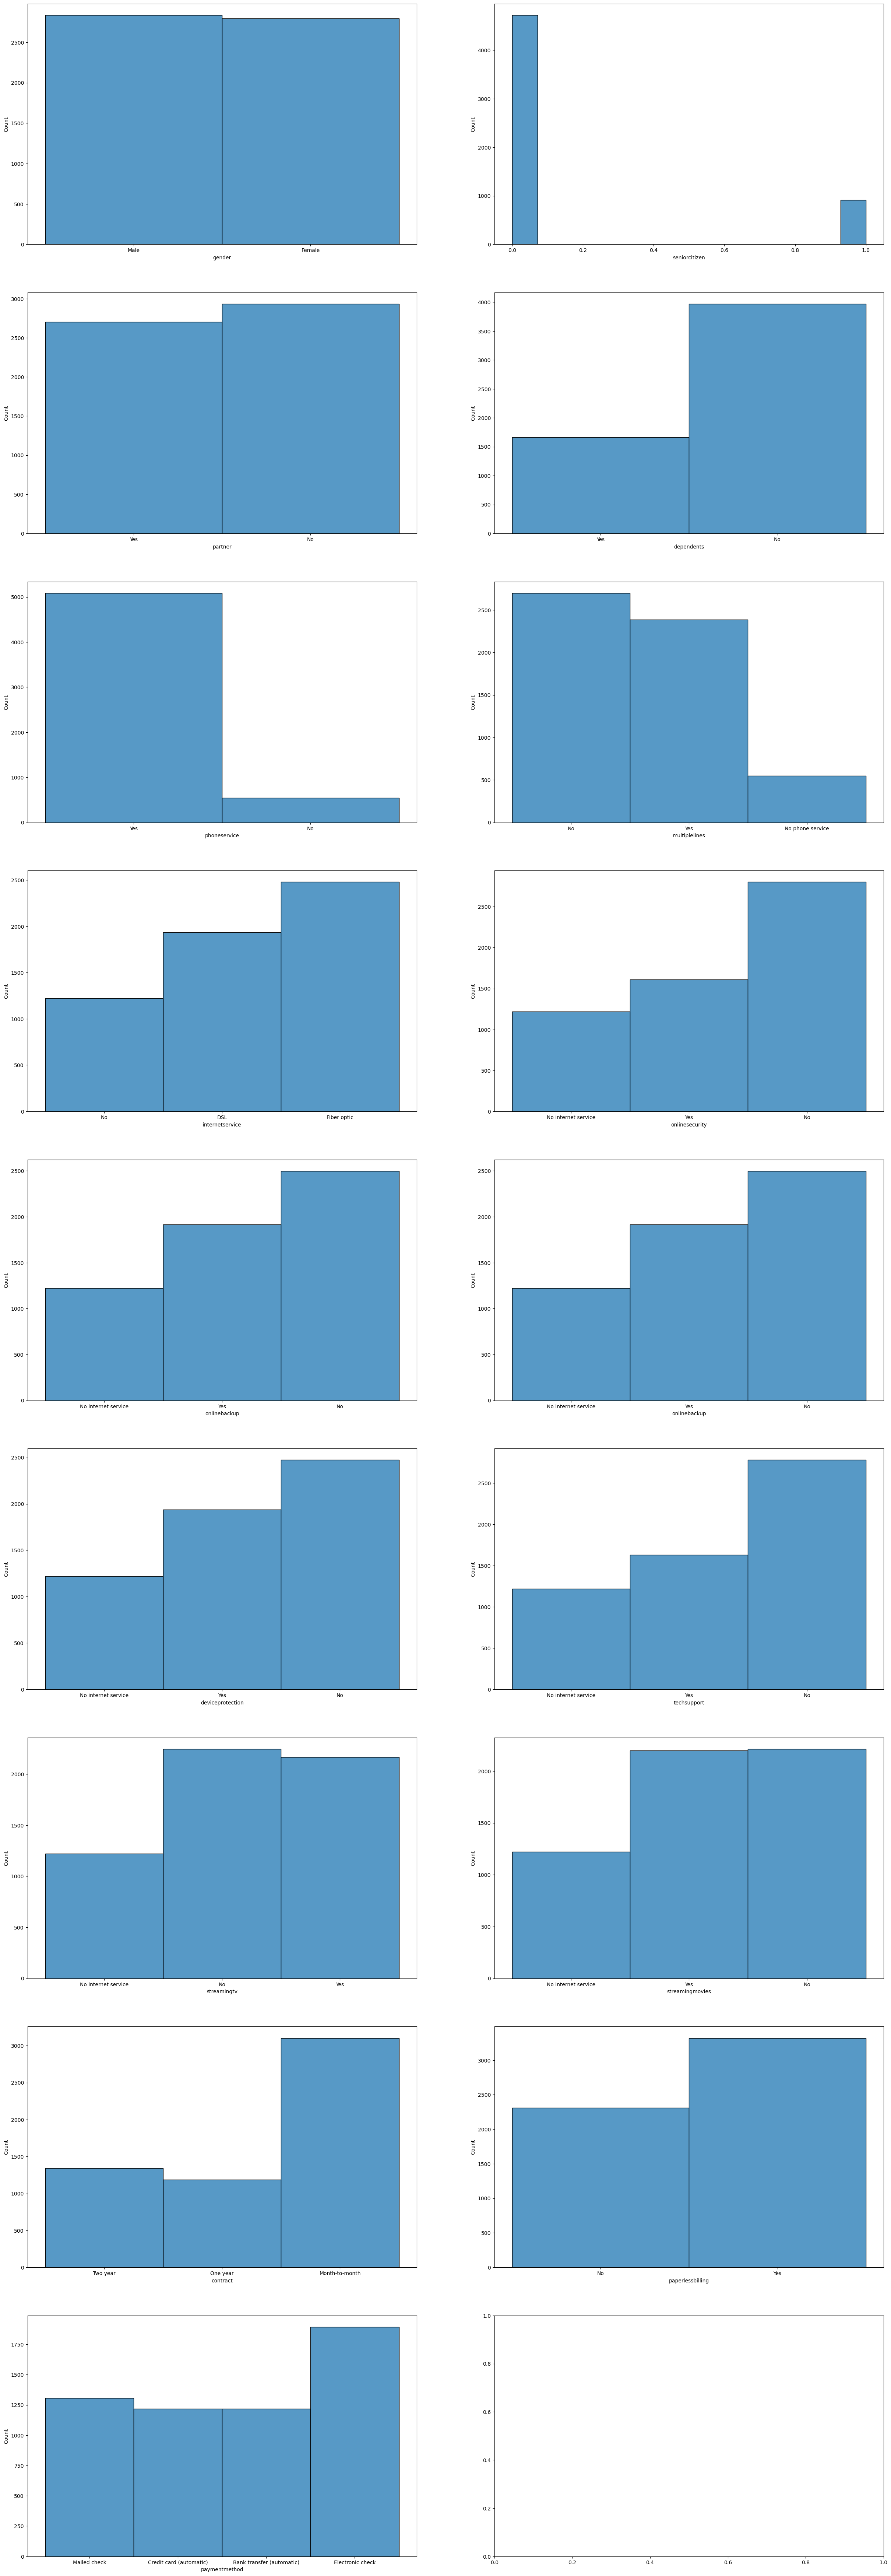

In [46]:
import math
import warnings
import matplotlib.pyplot as plt 
import seaborn as sns 

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
selected_columns = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice','multiplelines', 'internetservice',
                    'onlinesecurity', 'onlinebackup', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
                    'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']

# Set up the number of rows and columns for subplots
num_rows = math.ceil(len(selected_columns)/2)  # Adjust as needed
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15 * num_cols, 10 * num_rows))

# Loop through each feature and create distribution plots
for i, col in enumerate(selected_columns):
    sns.histplot(train_data[col], kde=False, ax=axes[i//2, i%2])

<AxesSubplot:>

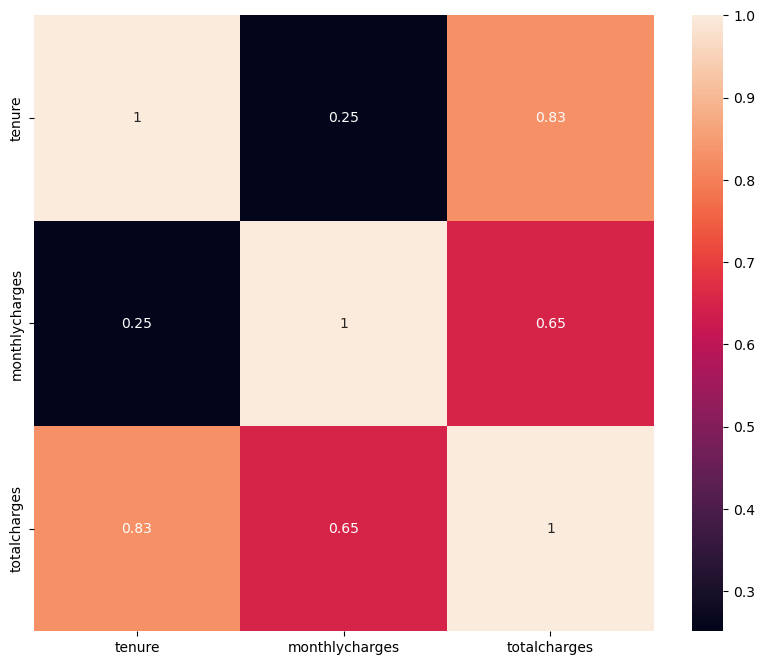

In [51]:
import matplotlib.pyplot as plt                                     
import seaborn as sns                                              
%matplotlib inline
plt.figure(figsize = [10, 8])
sns.heatmap(train_data[['tenure', 'monthlycharges', 'totalcharges']].corr(), annot = True)

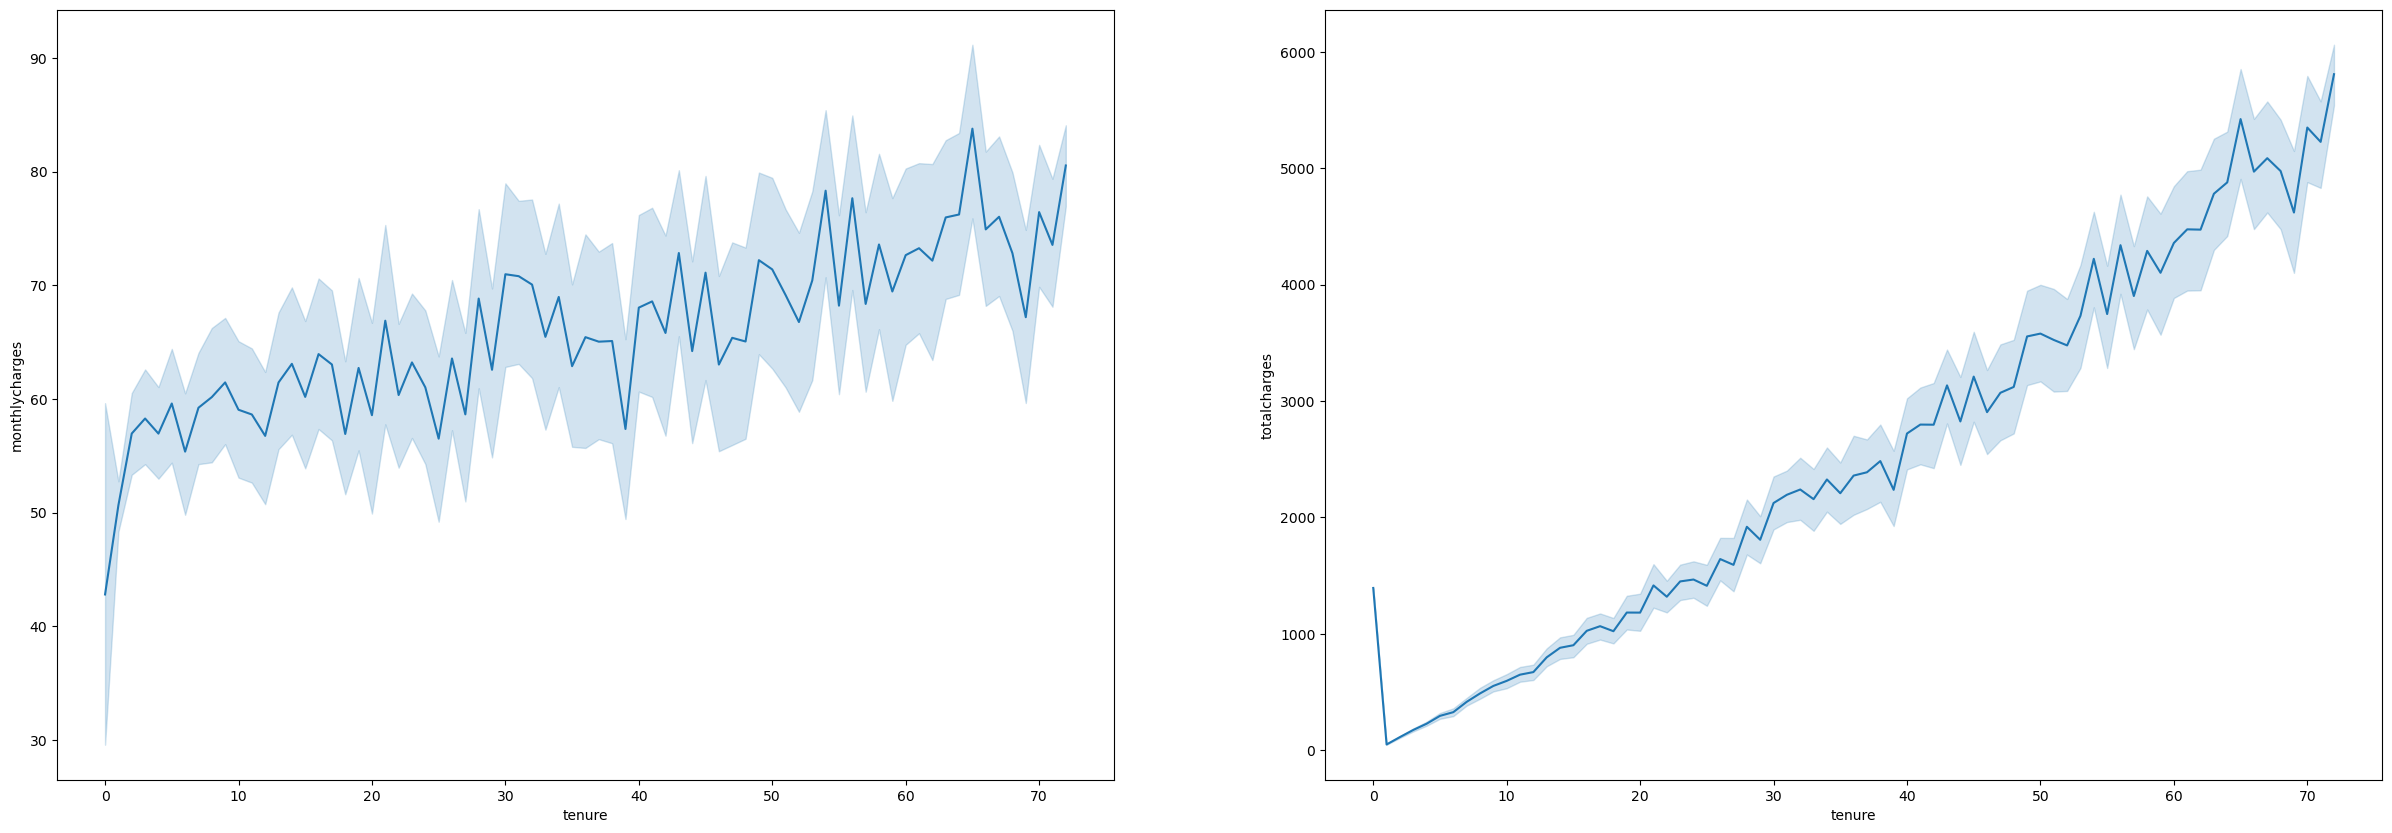

In [68]:
import math
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
selected_columns = ['monthlycharges', 'totalcharges']
# Set up the number of rows and columns for subplots
num_rows = math.ceil(len(selected_columns)/2)  # Adjust as needed
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15 * num_cols, 10 * num_rows))
# Loop through each feature and create distribution plots

for i, col in enumerate(['monthlycharges', 'totalcharges']):
    sns.lineplot(train_data['tenure'], train_data[col], ax=axes[i])

<AxesSubplot:xlabel='churn', ylabel='tenure'>

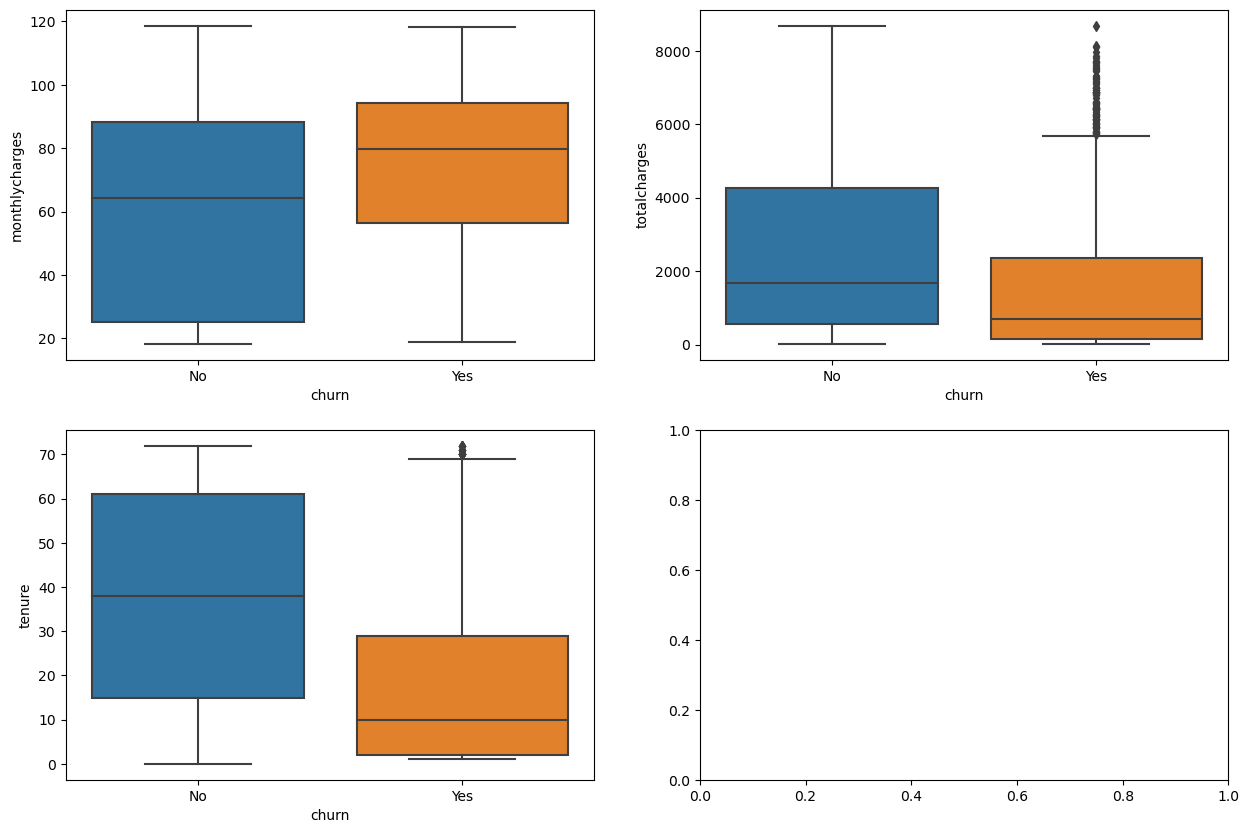

In [79]:
import seaborn as sns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(train_data['churn'],train_data['monthlycharges'],ax=ax[0,0])
sns.boxplot(train_data['churn'],train_data['totalcharges'],ax=ax[0,1])
sns.boxplot(train_data['churn'],train_data['tenure'],ax=ax[1,0])

<AxesSubplot:xlabel='totalcharges', ylabel='monthlycharges'>

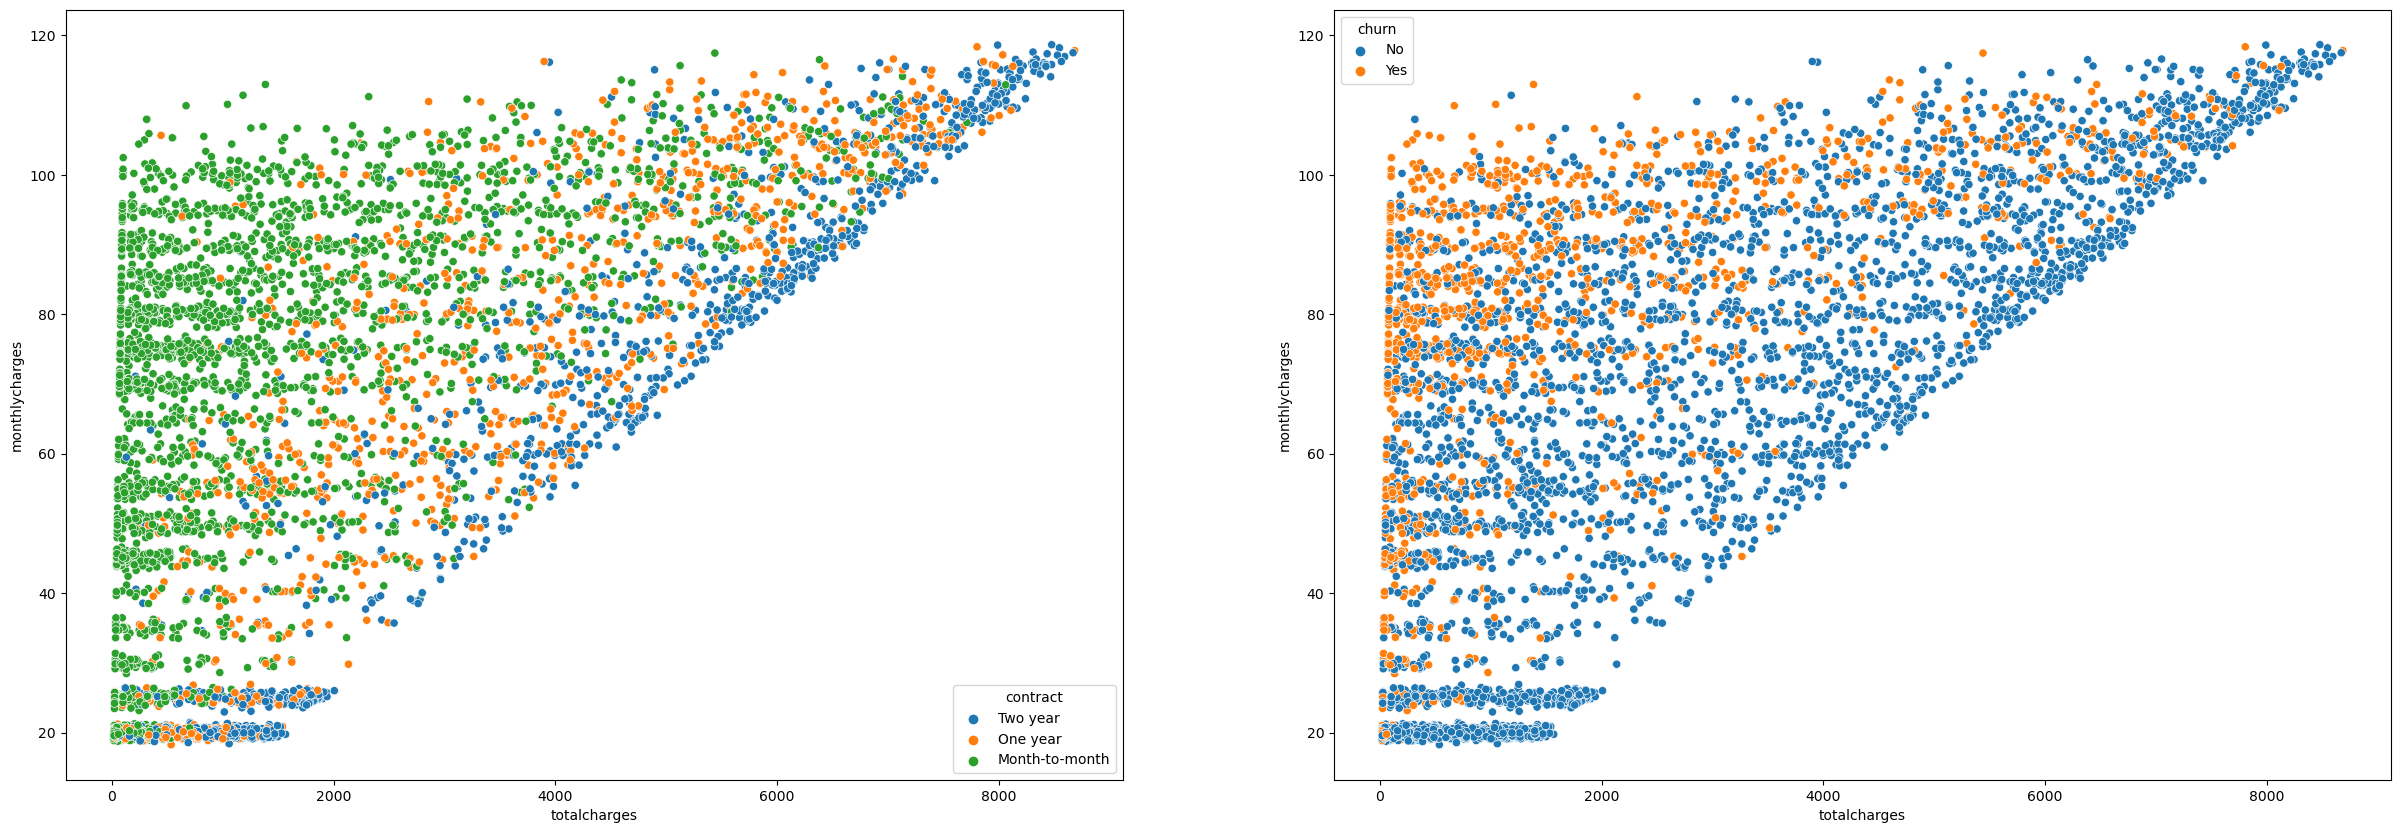

In [86]:
import math
import warnings
import seaborn as sns
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
selected_columns = ['monthlycharges', 'totalcharges']
# Set up the number of rows and columns for subplots
num_rows = math.ceil(len(selected_columns)/2)  # Adjust as needed
num_cols = 2

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15 * num_cols, 10 * num_rows))
# Loop through each feature and create distribution plots
sns.scatterplot(x=train_data['totalcharges'], y=train_data['monthlycharges'],hue=train_data['contract'],ax=axes[0])
sns.scatterplot(x=train_data['totalcharges'], y=train_data['monthlycharges'],hue=train_data['churn'],ax=axes[1])

In [128]:
# Split the data for x and y trains
x_train = train_data.drop(labels=['churn'], axis=1)
y_train = train_data['churn']
# x_test = test_data.drop(labels=['churn'], axis=1)
x_test = test_data
# y_test = test_data['churn']
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5634 non-null   object 
 1   seniorcitizen     5634 non-null   int64  
 2   partner           5634 non-null   object 
 3   dependents        5634 non-null   object 
 4   tenure            5634 non-null   int64  
 5   phoneservice      5634 non-null   object 
 6   multiplelines     5634 non-null   object 
 7   internetservice   5634 non-null   object 
 8   onlinesecurity    5634 non-null   object 
 9   onlinebackup      5634 non-null   object 
 10  deviceprotection  5634 non-null   object 
 11  techsupport       5634 non-null   object 
 12  streamingtv       5634 non-null   object 
 13  streamingmovies   5634 non-null   object 
 14  contract          5634 non-null   object 
 15  paperlessbilling  5634 non-null   object 
 16  paymentmethod     5634 non-null   object 


In [129]:
from sklearn.preprocessing import LabelEncoder  
le= LabelEncoder()

def lben(data):
    for i, col in enumerate(data.columns.tolist()):
        if data[col].dtype=='O':
            data[col]= le.fit_transform(data[col])
            
    return data

x_train=lben(x_train)
x_train.select_dtypes('object').columns.tolist()
x_test=lben(x_test)
# x_test.select_dtypes('object').columns.tolist()


    
    

In [131]:
# Standardizing training set and testing set
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Overriding X_train and X_test variable with new values (scaled)
x_train_scaled = pd.DataFrame(data=x_train_scaled, 
                              columns=x_train.columns)
x_test_scaled = pd.DataFrame(data=x_test_scaled,
                             columns=x_test.columns)

In [132]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# model.fit(x_train_scaled, y_train)
model.fit(x_train, y_train)

LogisticRegression()

In [134]:
y_train_predict=model.predict(x_train)
# y_train_predict=model.predict(x_train)
# y_test_predict=model.predict(x_test_scaled)
y_test_predict=model.predict(x_test)

In [117]:
from sklearn.metrics import accuracy_score,roc_auc_score, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
def evaluate(y_t,y_p):
    accuracy= accuracy_score(y_t, y_p)
    lr_report = classification_report(y_t, y_p)
    print ('Accuracy =', accuracy*100,'%')
    print(lr_report)
    from sklearn.metrics import confusion_matrix
    #confusion matrix#
    mx=confusion_matrix(y_t, y_p)
    confusion_matrix = pd.DataFrame(mx)
    confusion_matrix.index = ['Actual No','Actual Yes']
    confusion_matrix.columns = ['Predicted No', 'Predicted Yes']
    print(confusion_matrix)

evaluate(y_train,y_train_predict)
evaluate(y_train,y_test_predict)

Accuracy = 80.45793397231097 %
              precision    recall  f1-score   support

          No       0.85      0.89      0.87      4113
         Yes       0.66      0.57      0.61      1521

    accuracy                           0.80      5634
   macro avg       0.75      0.73      0.74      5634
weighted avg       0.80      0.80      0.80      5634

            Predicted No  Predicted Yes
Actual No           3667            446
Actual Yes           655            866


In [102]:
y_train.value_counts()

No     4113
Yes    1521
Name: churn, dtype: int64

In [109]:
unique_values, counts = np.unique(y_train_predict ,return_counts=True)

In [112]:
counts[0]
unique_values[0]

'No'

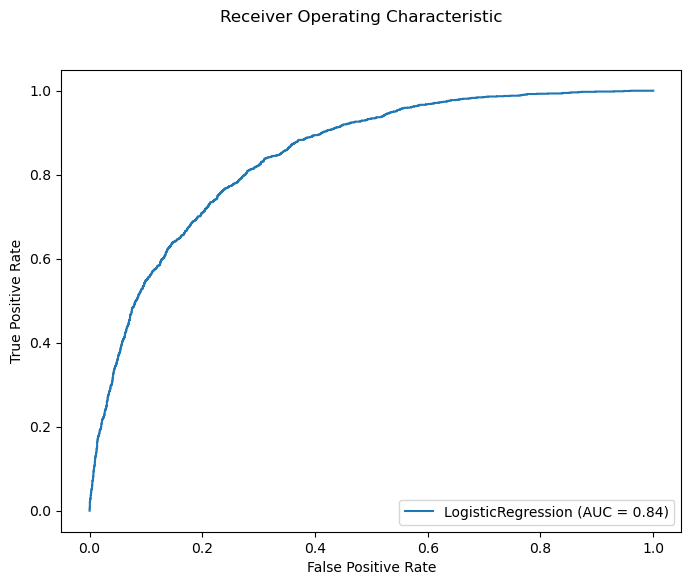

In [114]:
import sklearn.metrics as metrics
from sklearn.metrics import plot_roc_curve

# Assuming you have already trained a logistic regression model (logreg) and have X_test and y_test data

# Create an instance of the plot_roc_curve function with your trained model
roc_disp = plot_roc_curve(model, x_train_scaled, y_train)

# Customize the plot if needed (e.g., setting title and labels)

roc_disp.figure_.set_size_inches(8, 6)
roc_disp.figure_.suptitle("Receiver Operating Characteristic")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# Show the ROC curve plot
plt.show()


In [138]:
test_data = pd.read_csv('C:/Users/A208818/Downloads/Telecom-Churn/Churn_test.csv')
test_data['y_test_predict']=y_test_predict
test_data[['customerID', 'y_test_predict']].to_csv('churn_output.csv',header=False, index=False)